<a href="https://colab.research.google.com/github/YOOKJIN/ML-DL-Study/blob/main/Part9_RNN_for_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

09-1 순차 데이터와 순환 신경망


09-2 순환신경망으로 IMDB 리뷰 분류하기


In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))

218


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


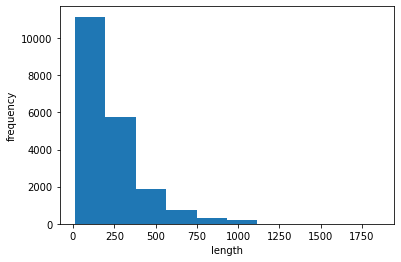

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
#순환 신경망 만들기

from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


순환신경망 학습하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 39s 116ms/step - loss: 0.6988 - accuracy: 0.5144 - val_loss: 0.6967 - val_accuracy: 0.5136
Epoch 2/100
313/313 [==============================] - 34s 110ms/step - loss: 0.6872 - accuracy: 0.5469 - val_loss: 0.6813 - val_accuracy: 0.5626
Epoch 3/100
313/313 [==============================] - 34s 109ms/step - loss: 0.6636 - accuracy: 0.6093 - val_loss: 0.6512 - val_accuracy: 0.6386
Epoch 4/100
313/313 [==============================] - 34s 109ms/step - loss: 0.6376 - accuracy: 0.6603 - val_loss: 0.6308 - val_accuracy: 0.6732
Epoch 5/100
313/313 [==============================] - 34s 108ms/step - loss: 0.6171 - accuracy: 0.6913 - val_loss: 0.6107 - val_accuracy: 0.6990
Epoch 6/100
313/313 [==============================] - 34s 109ms/step - loss: 0.5984 - accuracy: 0.7117 - val_loss: 0.5943 - val_accuracy: 0.7148
Epoch 7/100
313/313 [==============================] - 35s 111ms/step - loss: 0.5816 - accuracy: 0.7274 - val_loss: 0.5801 -

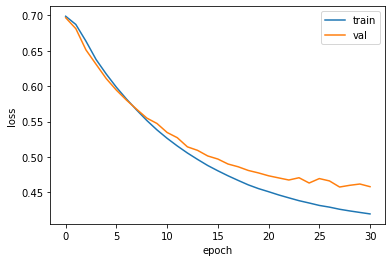

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#단어 임베딩 사용

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 45s 140ms/step - loss: 0.6900 - accuracy: 0.5346 - val_loss: 0.6836 - val_accuracy: 0.5734
Epoch 2/100
313/313 [==============================] - 41s 132ms/step - loss: 0.6729 - accuracy: 0.6236 - val_loss: 0.6672 - val_accuracy: 0.6460
Epoch 3/100
313/313 [==============================] - 42s 133ms/step - loss: 0.6546 - accuracy: 0.6838 - val_loss: 0.6496 - val_accuracy: 0.6890
Epoch 4/100
313/313 [==============================] - 41s 130ms/step - loss: 0.6352 - accuracy: 0.7146 - val_loss: 0.6302 - val_accuracy: 0.7104
Epoch 5/100
313/313 [==============================] - 41s 130ms/step - loss: 0.6153 - accuracy: 0.7308 - val_loss: 0.6126 - val_accuracy: 0.7212
Epoch 6/100
313/313 [==============================] - 43s 136ms/step - loss: 0.5943 - accuracy: 0.7440 - val_loss: 0.5932 - val_accuracy: 0.7360
Epoch 7/100
313/313 [==============================] - 44s 141ms/step - loss: 0.5737 - accuracy: 0.7592 - val_loss: 0.5733 -

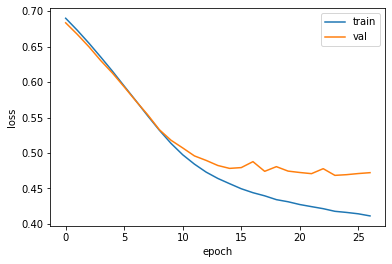

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

09-3 LSTM과 GRU 셀

In [ ]:
#LSTM 신경망 훈련

from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 22ms/step - loss: 0.6924 - accuracy: 0.5367 - val_loss: 0.6912 - val_accuracy: 0.5988
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6889 - accuracy: 0.6303 - val_loss: 0.6863 - val_accuracy: 0.6518
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6792 - accuracy: 0.6777 - val_loss: 0.6691 - val_accuracy: 0.7036
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6338 - accuracy: 0.7174 - val_loss: 0.5970 - val_accuracy: 0.7264
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5766 - accuracy: 0.7326 - val_loss: 0.5661 - val_accuracy: 0.7352
Epoch 6/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5500 - accuracy: 0.7484 - val_loss: 0.5446 - val_accuracy: 0.7520
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5272 - accuracy: 0.7614 - val_loss: 0.5248 - val_accuracy

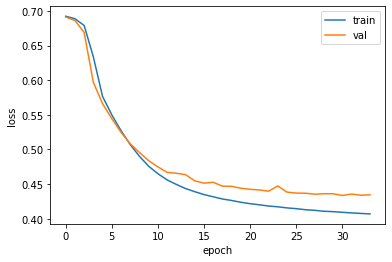

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#순환증에 드롭아웃 적용하기

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6918 - accuracy: 0.5554 - val_loss: 0.6907 - val_accuracy: 0.5796
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6886 - accuracy: 0.6080 - val_loss: 0.6865 - val_accuracy: 0.6196
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6813 - accuracy: 0.6390 - val_loss: 0.6750 - val_accuracy: 0.6418
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6476 - accuracy: 0.6582 - val_loss: 0.6174 - val_accuracy: 0.6952
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5950 - accuracy: 0.7250 - val_loss: 0.5841 - val_accuracy: 0.7386
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5716 - accuracy: 0.7438 - val_loss: 0.5646 - val_accuracy: 0.7488
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5529 - accuracy: 0.7545 - val_loss: 0.5478 - val_accuracy:

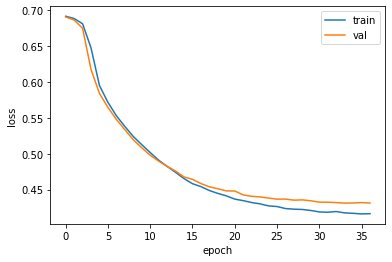

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#2개의 층을 연결하기

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 46ms/step - loss: 0.6927 - accuracy: 0.5342 - val_loss: 0.6923 - val_accuracy: 0.5112
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6899 - accuracy: 0.5877 - val_loss: 0.6866 - val_accuracy: 0.6364
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6726 - accuracy: 0.6433 - val_loss: 0.6496 - val_accuracy: 0.6720
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6063 - accuracy: 0.6966 - val_loss: 0.5738 - val_accuracy: 0.7154
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5621 - accuracy: 0.7232 - val_loss: 0.5451 - val_accuracy: 0.7354
Epoch 6/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5401 - accuracy: 0.7426 - val_loss: 0.5254 - val_accuracy: 0.7508
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5227 - accuracy: 0.7515 - val_loss: 0.5213 - val_ac

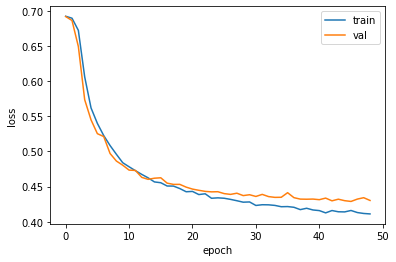

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
#GRU 신경망 훈련하기

model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 22ms/step - loss: 0.6925 - accuracy: 0.5174 - val_loss: 0.6916 - val_accuracy: 0.5364
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6904 - accuracy: 0.5659 - val_loss: 0.6896 - val_accuracy: 0.5710
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6873 - accuracy: 0.5951 - val_loss: 0.6860 - val_accuracy: 0.5818
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6824 - accuracy: 0.6063 - val_loss: 0.6805 - val_accuracy: 0.5978
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6750 - accuracy: 0.6184 - val_loss: 0.6725 - val_accuracy: 0.6080
Epoch 6/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6641 - accuracy: 0.6321 - val_loss: 0.6610 - val_accuracy: 0.6168
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6489 - accuracy: 0.6465 - val_loss: 0.6442 - val_accuracy:

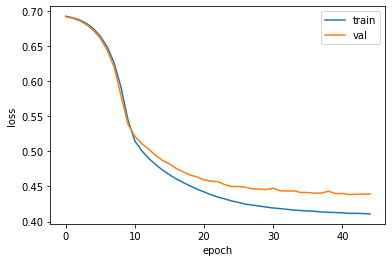

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# LSTM과 GRU 셀로 훈련

test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 13s 15ms/step - loss: 0.4240 - accuracy: 0.8004


[0.42398226261138916, 0.8004000186920166]